In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
######## import data #########
name = open('astroNamesNormalized.dat','r').read().splitlines()
bday = open('dat/born','r').read().splitlines()
kids = open('dat/children','r').read().splitlines()
educ = open('dat/education','r').read().splitlines()
edSp = open('dat/eduSpec.clean','r').read().splitlines()
hobb = open('dat/interests','r').read().splitlines()
lang = open('dat/languages','r').read().splitlines()
mary = open('dat/married','r').read().splitlines()
mill = open('dat/millitary','r').read().splitlines()
flys = open('dat/pilot','r').read().splitlines()
expr = open('dat/experience','r').read().splitlines()

In [3]:
######## age data ###########
for i in range(len(bday)) :
    bday[i] = int(bday[i])
    if bday[i] != 0 :
        bday[i] = 2016 - bday[i]
#how much data do we have? (count null entries and percentage nulls)
print 'there are ', bday.count(0), 'zeros in the age list,'
print 'which is ', 100 * float(bday.count(0)) / float(len(bday)), 'percent of the total'
#calculate the average age of the current astronaut class
ave = []
for i in range(len(bday)) :
        if bday[i] != 0 : ave.append(bday[i])
aveNum = np.mean(ave)
print 'the average age is ', aveNum

there are  17 zeros in the age list,
which is  36.170212766 percent of the total
the average age is  50.0666666667


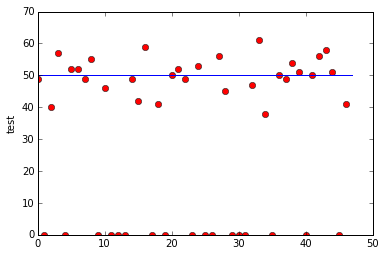

In [4]:
#plot age 
plt.plot(bday,'ro',[0,len(bday)],[aveNum,aveNum])
plt.ylabel('test')
plt.show()

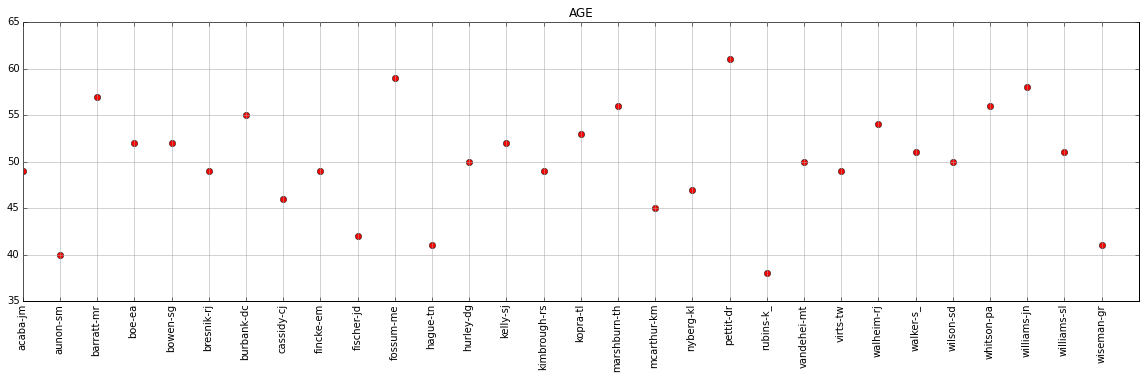

In [22]:
#plot age
temp1 = []
temp2 = []

for i in range(len(bday)) :
    if bday[i] != 0 :
        temp1.append(bday[i])
        temp2.append(name[i])
        
plt.figure(figsize=(20,5))
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.plot(temp1,'ro')
plt.title("AGE")
plt.xticks(range(len(temp2)),temp2,rotation='vertical')
#plt.show()

#save the fig
plt.savefig('figs/age', dpi=200)

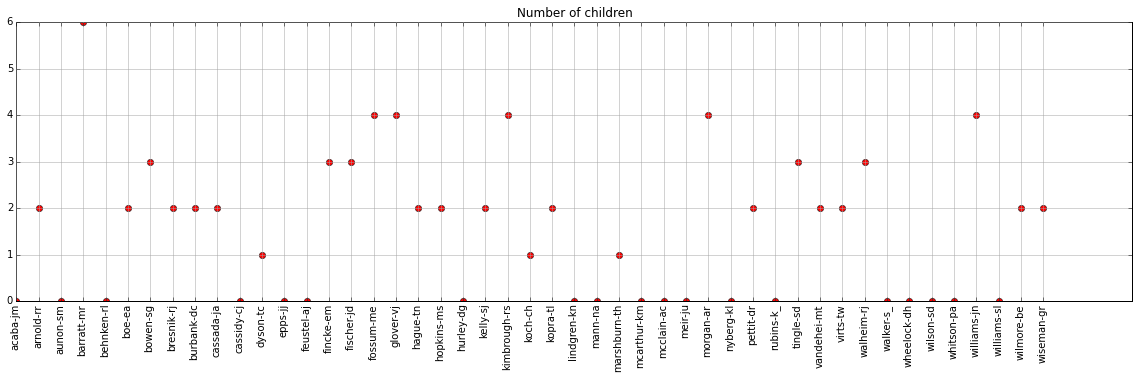

In [20]:
#plot number of children
temp1 = [0] * len(kids)
for i in range(len(kids)) :
    temp1[i] = int(kids[i][1]) + int(kids[i][4]) + int(kids[i][7])

plt.figure(figsize=(20,5))
plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.plot(temp1,'ro')
plt.title("Number of children")
plt.xticks(range(len(name)),name,rotation='vertical')
#plt.show()


#save the fig
plt.savefig('figs/kids', dpi=200)

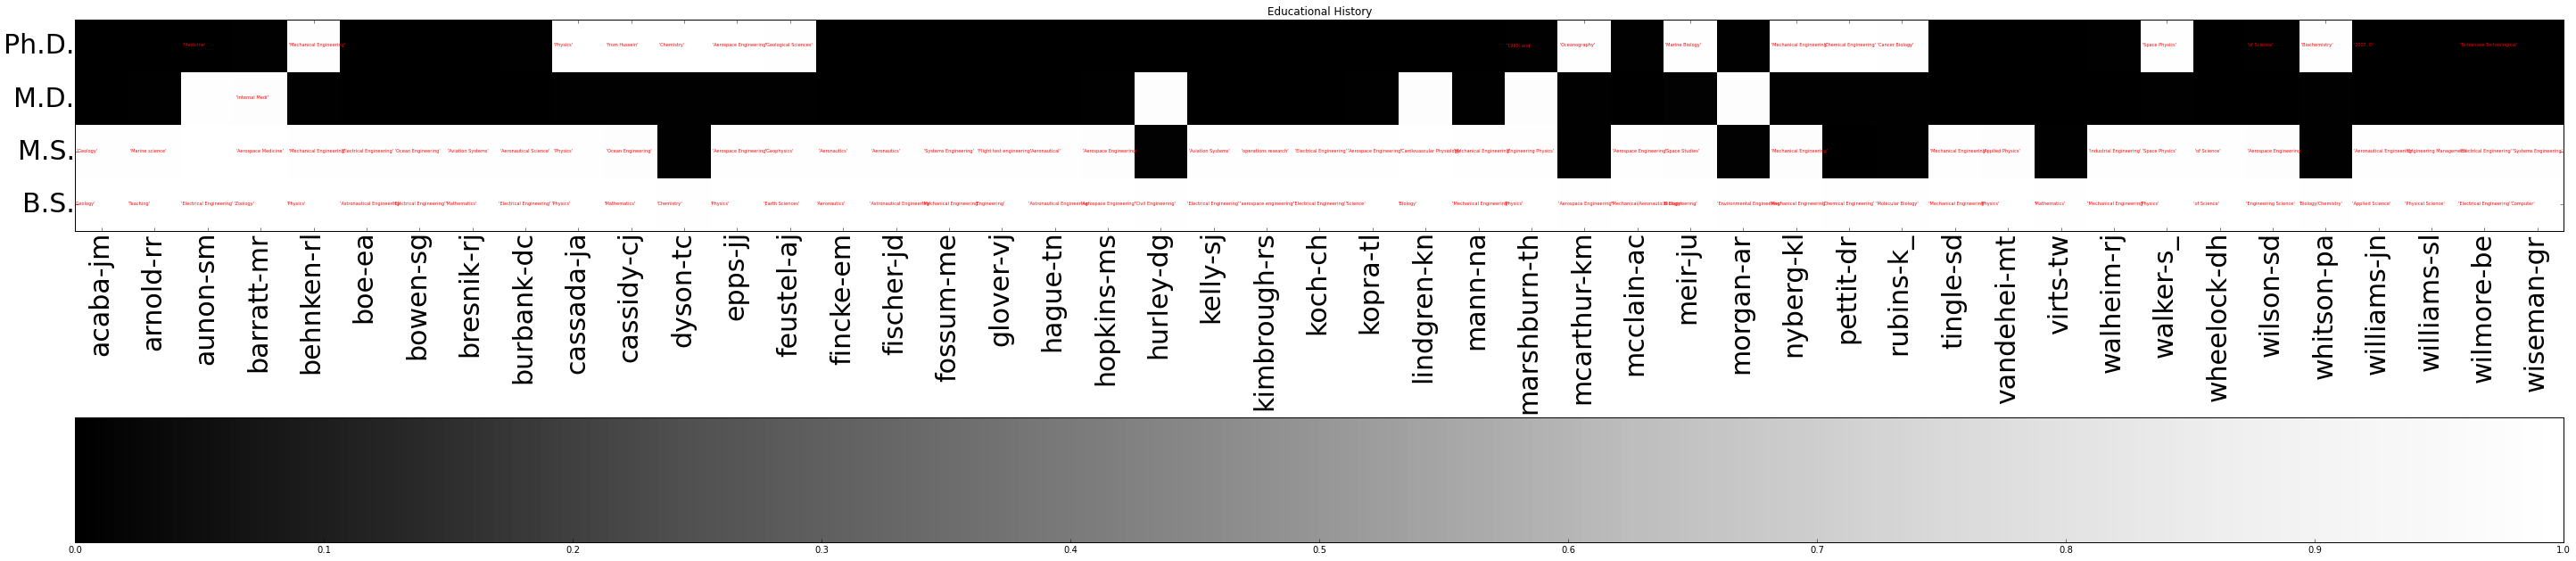

In [7]:
#format educational history arrays
temp = []
for i in range(len(educ)) :
    if len(list(educ[i])) == 4 :
        temp.append([int(list(educ[i])[0]),int(list(educ[i])[1]),int(list(educ[i])[2]),int(list(educ[i])[3])])
    if len(list(educ[i])) == 3 :
        temp.append([0,int(list(educ[i])[0]),int(list(educ[i])[1]),int(list(educ[i])[2])])
    if len(list(educ[i])) == 2 :
        temp.append([0,0,int(list(educ[i])[0]),int(list(educ[i])[1])])
    if len(list(educ[i])) == 1 :
        temp.append([0,0,0,int(list(educ[i])[0])])
        
temp2 = []
for i in range(len(edSp)) :
    temp2.append(edSp[i].split(','))

#display inline plot (too small to read)
plt.figure(figsize=(50,25))
plt.title('Educational History')
plt.xticks(range(len(name)),name,rotation='vertical', fontsize=30)
plt.yticks([0,1,2,3],['Ph.D.','M.D.','M.S.','B.S.'], fontsize=30)
plt.imshow(np.transpose(temp), interpolation='none', cmap='Greys_r')
for i in range(len(temp2)) :
    for j in range(4) :
        if len(temp2[i][j]) > 3 :
            plt.annotate(temp2[i][j], xy=(i-.5,3-j), xytext=(i-.5,3-j), color='Red', fontsize=5)
plt.colorbar(orientation='horizontal')
#show() method not needed when %inline is true
#plt.show()

#build .png for actual viewing
plt.savefig('figs/edu', dpi=200)

In [8]:
#languages
np.transpose(lang)

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', 'Russian Japanese', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', 'Swedish', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], 
      dtype='|S16')

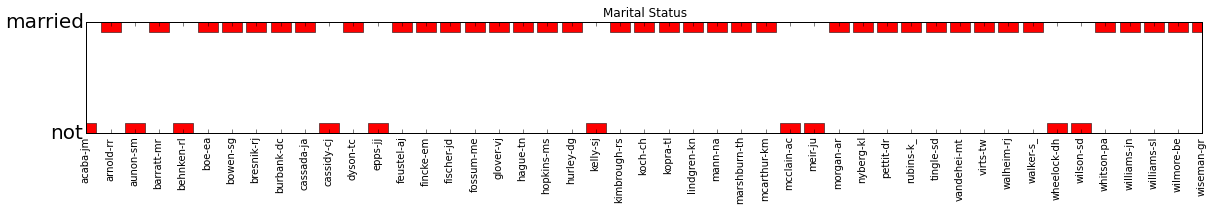

In [19]:
#marital status
plt.figure(figsize=(20,2))
plt.xticks(range(len(name)),name,rotation='vertical', fontsize=10)
plt.yticks([0,1],['not','married'], fontsize=20)
plt.plot(mary,'rs', markersize=20)
plt.title('Marital Status')
#plt.show()

#save the fig
plt.savefig('figs/married', dpi=200)

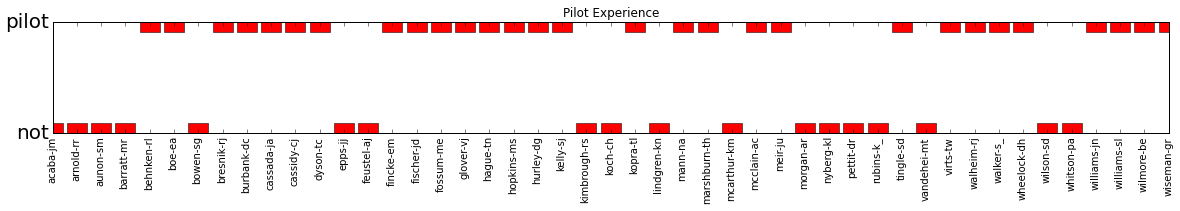

In [21]:
#pilot
plt.figure(figsize=(20,2))
plt.xticks(range(len(name)),name,rotation='vertical', fontsize=10)
plt.yticks([0,1],['not','pilot'], fontsize=20)
plt.plot(flys,'rs', markersize=20)
plt.title('Pilot Experience')
#plt.show()

#save the fig
plt.savefig('figs/pliot', dpi=200)

captain USCG


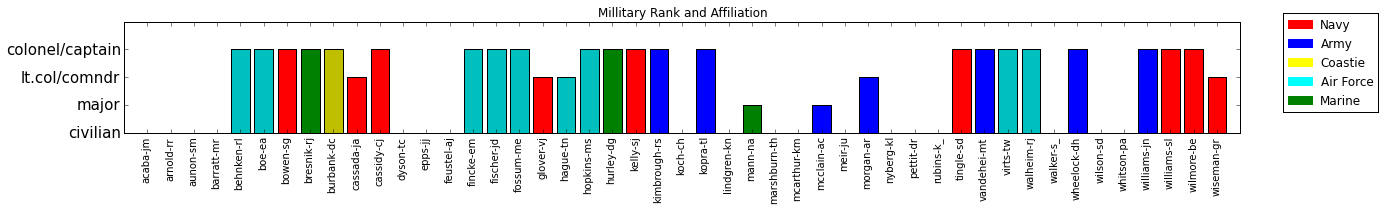

In [18]:
#millitary branch and rank

#are there any captains outside the USN or USCG?
for i in range(len(mill)) :
    if mill[i] != '0':
        if ((mill[i].split()[0] == 'captain') & (mill[i].split()[1] != 'USN')) :
            print mill[i]
#no

#build arrays for rank and affiliation
temp = [0] * len(mill)
temp2 = [0] * len(mill)

for i in range(len(mill)) :
    if mill[i] == '0' :
        temp[i] = 0
    else :
        if mill[i].split()[0] == 'major' : temp[i] = 1
        if mill[i].split()[0] == 'lt.col' : temp[i] = 2
        if mill[i].split()[0] == 'commander' : temp[i] = 2
        if mill[i].split()[0] == 'colonel' : temp[i] = 3
        if mill[i].split()[0] == 'captain' : temp[i] = 3

for i in range(len(mill)) :
    if mill[i] == '0' :
        temp2[i] = 'k'
    else :
        if mill[i].split()[1] == 'USN' : temp2[i] = 'r'
        if mill[i].split()[1] == 'USA' : temp2[i] = 'b'
        if mill[i].split()[1] == 'USMC' : temp2[i] = 'g'
        if mill[i].split()[1] == 'USAF' : temp2[i] = 'c'
        if mill[i].split()[1] == 'USCG' : temp2[i]= 'y'
                        
#plot it using colors as affiliation and bar height as rank
plt.figure(figsize=(20,2))
plt.xticks(range(len(name)),name,rotation='vertical', fontsize=10)
plt.yticks(range(4),['civilian','major','lt.col/comndr','colonel/captain'], fontsize=15)
plt.bar(range(len(temp)), temp, align='center', color=temp2)
plt.xlim([-1, 47])
plt.ylim([0,4])
red_patch = mpatches.Patch(color='red', label='Navy')
blue_patch = mpatches.Patch(color='blue', label='Army')
yellow_patch = mpatches.Patch(color='yellow', label='Coastie')
cyan_patch = mpatches.Patch(color='cyan', label='Air Force')
green_patch = mpatches.Patch(color='green', label='Marine')
plt.legend(handles=[red_patch,blue_patch,yellow_patch,cyan_patch,green_patch], 
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.title('Millitary Rank and Affiliation')
#plt.show()

#save the fig
plt.savefig('figs/mil', dpi=200)

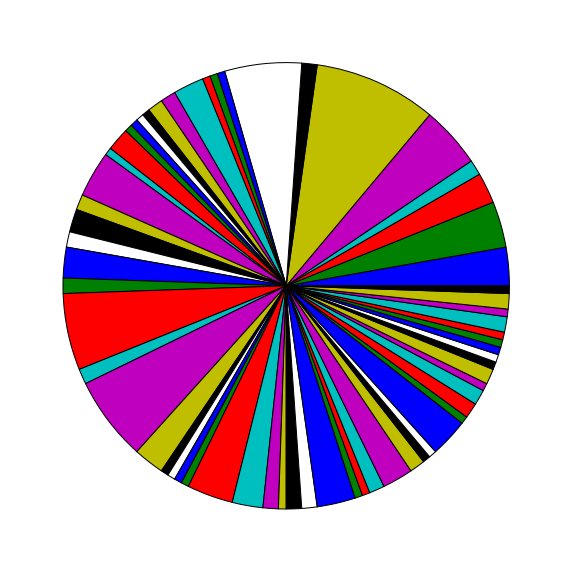

In [37]:
#hobbies and interests

#get percentages and counts of each hobby
di = ['camping', 'hiking', 'biking', 'kayak', 'scuba','running',
'fishing', 'reading', 'bicycling', 'ornithology', 'paleontology', 'guitar','basketball', 'softball',
'martial arts', 'cricket', 'jet skiing','writing', 'sailing', 'boat restoration','travel','music',
'photography','weight training', 'sports', 'motorcycl', 'family','church','skiing','astronomy','auto repair',
'auto restoration','geology','languages','backpacking','flying','exercise','hockey','football', 'hunting',
 'cycling','NASCAR',' baseball', 'golf','weightlifting','climbing', 'paddling','yoga','swimming','movies',
 'snowboarding','cooking','rugby','soccer','history','sewing', 'drawing','painting','piano','windsurfing',
 'woodworking','music','stamp collecting']
diCount = [0] * len(di)
diPerc = [0] * len(di)

for j in range(len(di)) :
    for i in range(len(hobb)) :
        if hobb[i].find(di[j]) != -1 :
            diCount[j] += 1
            
for i in range(len(diPerc)) :
    diPerc[i] = 100 * float(diCount[i]) / float(len(hobb))

#plot
plt.figure(figsize=(10,10))
plt.pie(diPerc)
plt.show()

In [9]:
#professional experience
expr;